# The Goal: Predicting photometric redshift using photometric data (as the input) and spectroscopic redshift (as the target). Here the model we use is a linear one. 

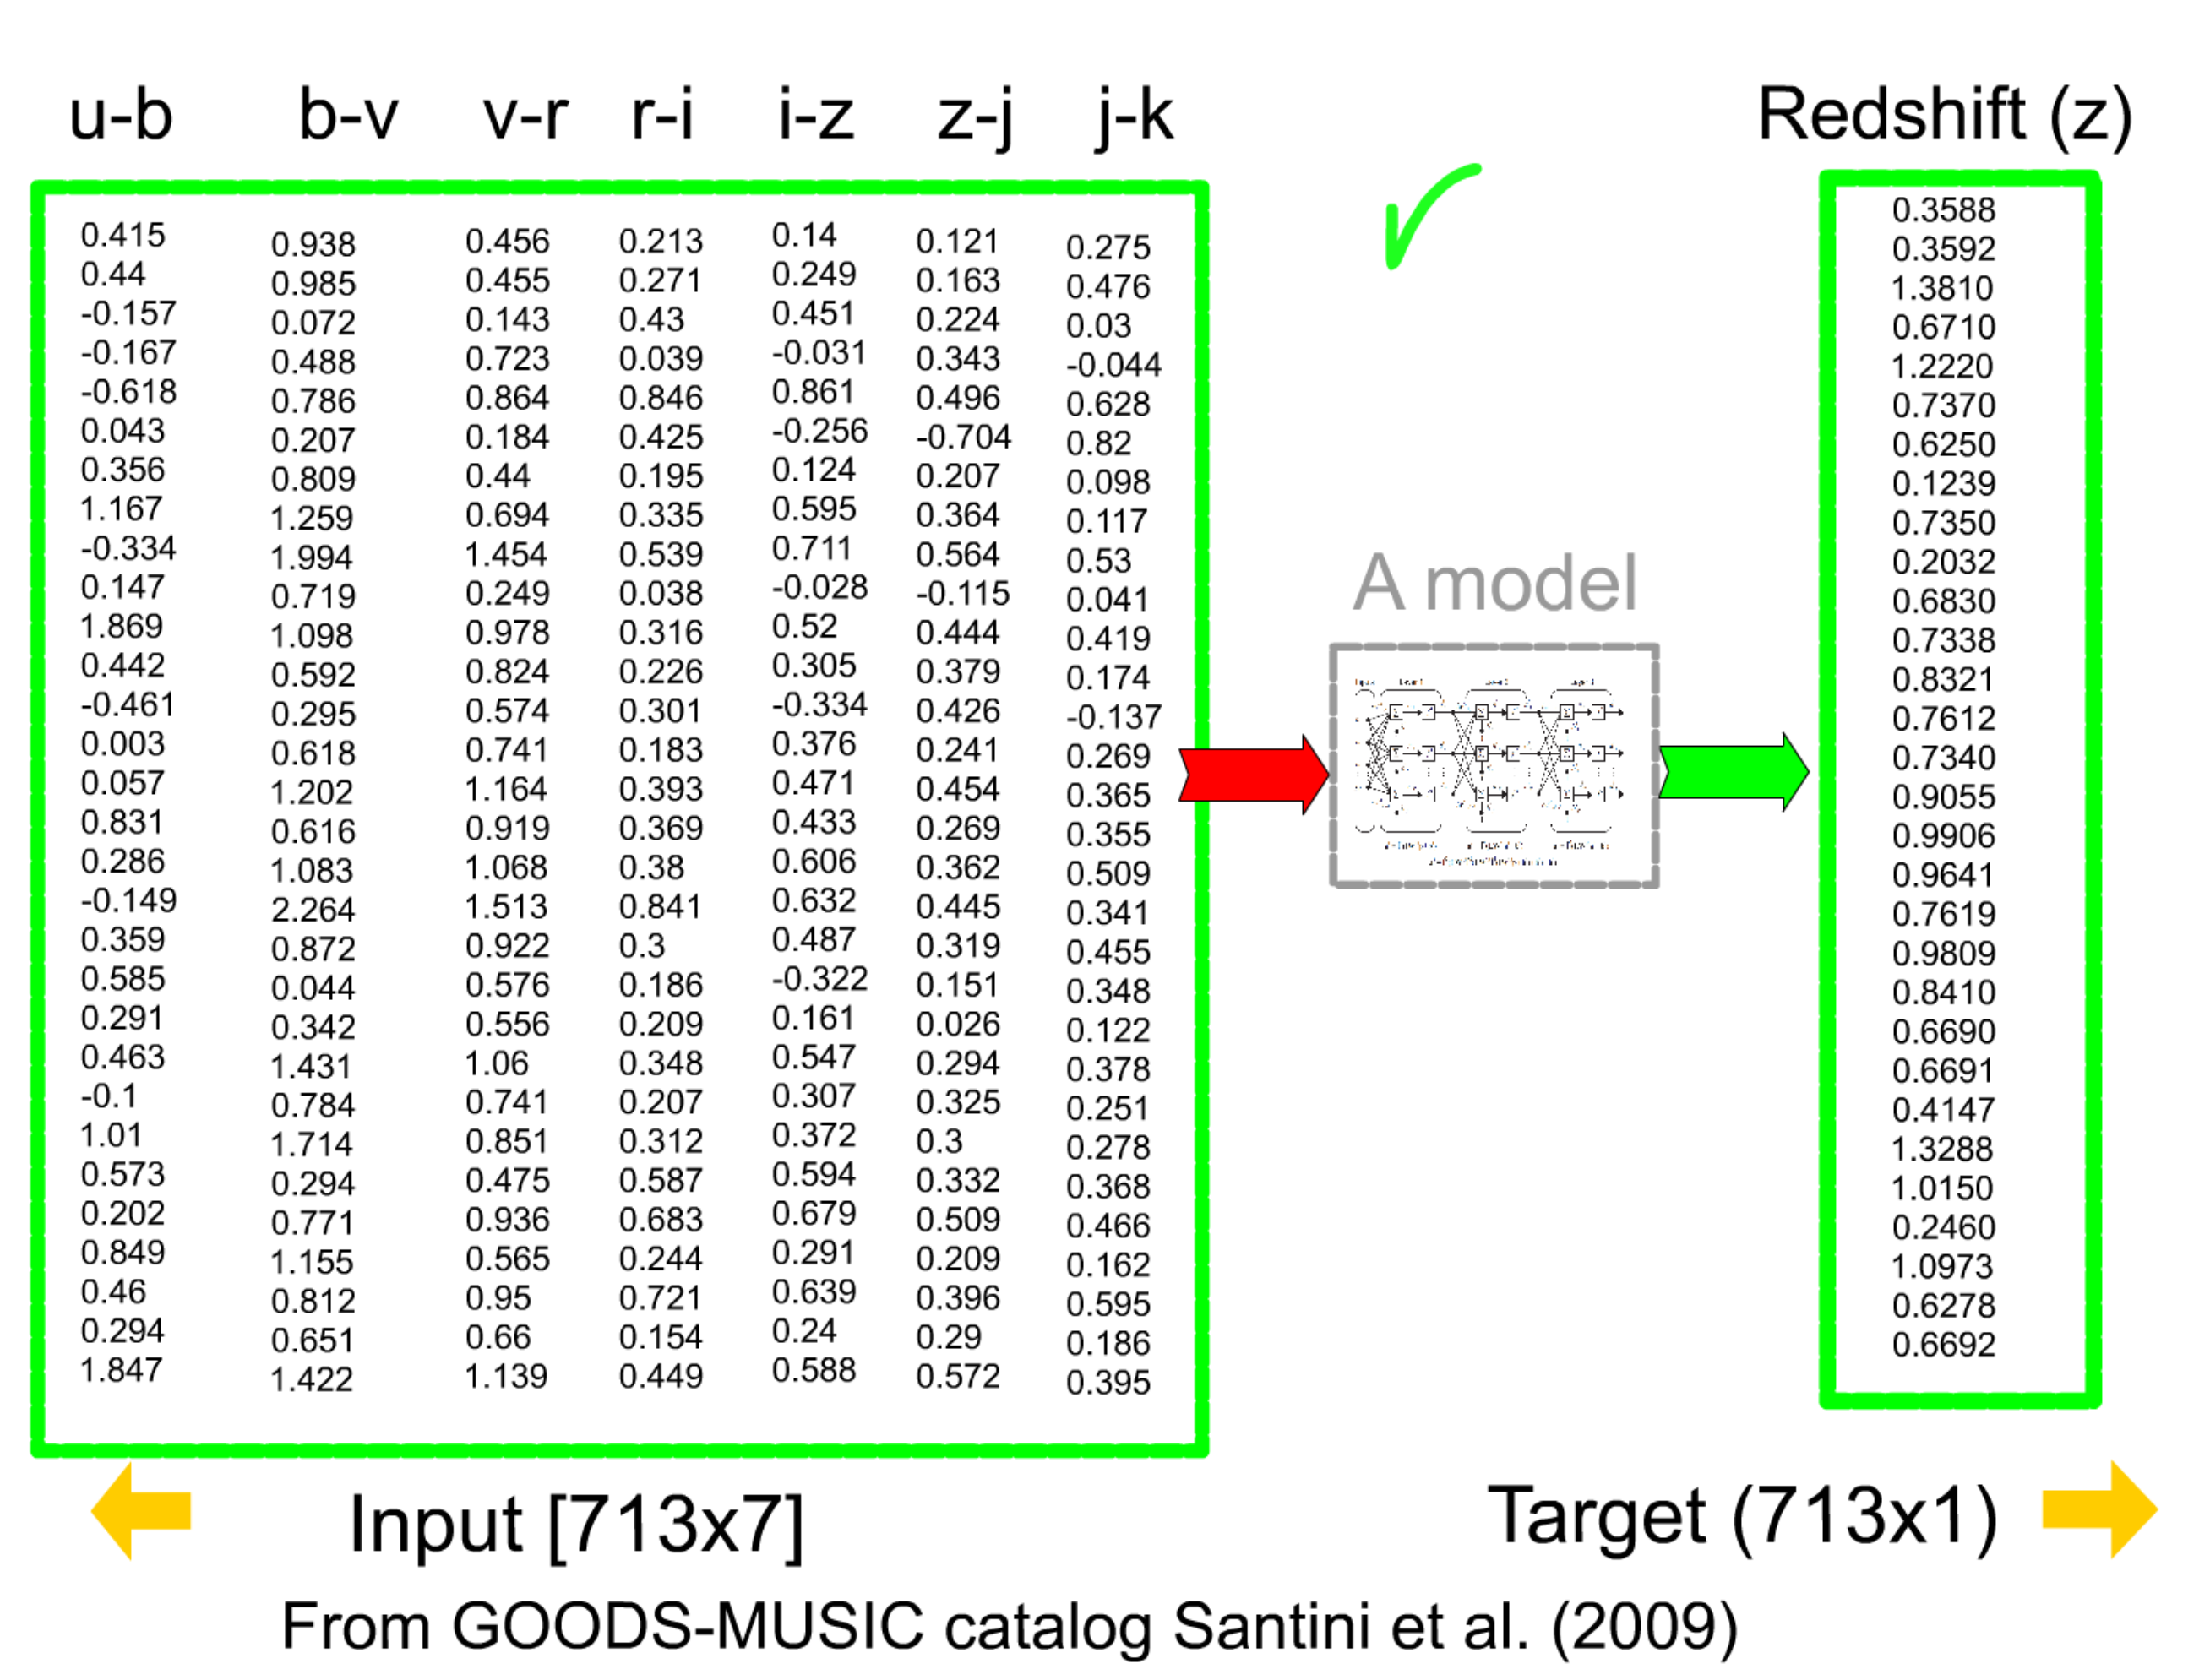

# Loading packages

In [26]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
print('Done!')



Done!


In [27]:
X=np.load('inp_redshift.npy')  # load the input
Y=np.load('tar_redshift.npy')  # load the target

In [28]:
print(np.shape(X),np.shape(Y)) #Check the size and dimension of the input and the target

(713, 7) (713,)


# Exploring the data and seeing the distribution of a selected column

Text(0.5, 0, 'X0')

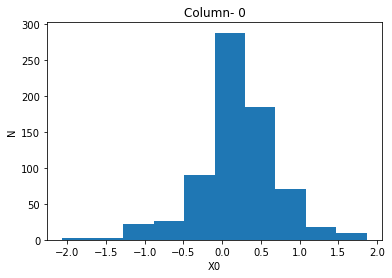

In [30]:
# Choose a column to see the distribution

n_column = 0

plt.hist(X[:,n_column])
plt.title('Column- '+str(n_column))
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

# Randomly separate 713 samples to the training set (75%) and validation set (25%). The corresponding targets are also separated. 

In [32]:
from sklearn.model_selection import train_test_split
X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

training set ==  (534, 7) (534,) ,, validation set ==  (179, 7) (179,)


# Normalization.


In [33]:
#Line #1: Import a model, for normalization, like StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#Line #2: fitting (finding the parameters of the model based on the training set). Assign a name (scaler_S which can transform a new data after training)

#Line #3: Predicted (transformed) values for the training set

#Line #4: Predicted (transformed) values for the validation set (using the model that has been trained using the training set).


from sklearn.preprocessing import StandardScaler, MinMaxScaler  #line #1

scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

print('Done!')

Done!


# Comparing the distributions from the nomalized training and validation sets

Text(0.5, 0, 'X1')

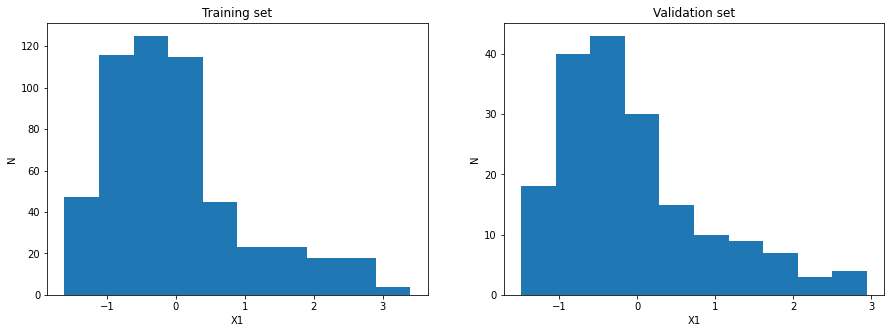

In [36]:
n_column = 1

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(X_tr_Norm[:,n_column])
plt.title('Training set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))


plt.subplot(1, 2, 2)
plt.hist(X_va_Norm[:,n_column])
plt.title('Validation set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

In [8]:
# Change the shape of the target (if you have a one-component  target )
# Y=np.reshape(Y,-1)
# print(np.shape(X),np.shape(Y))   

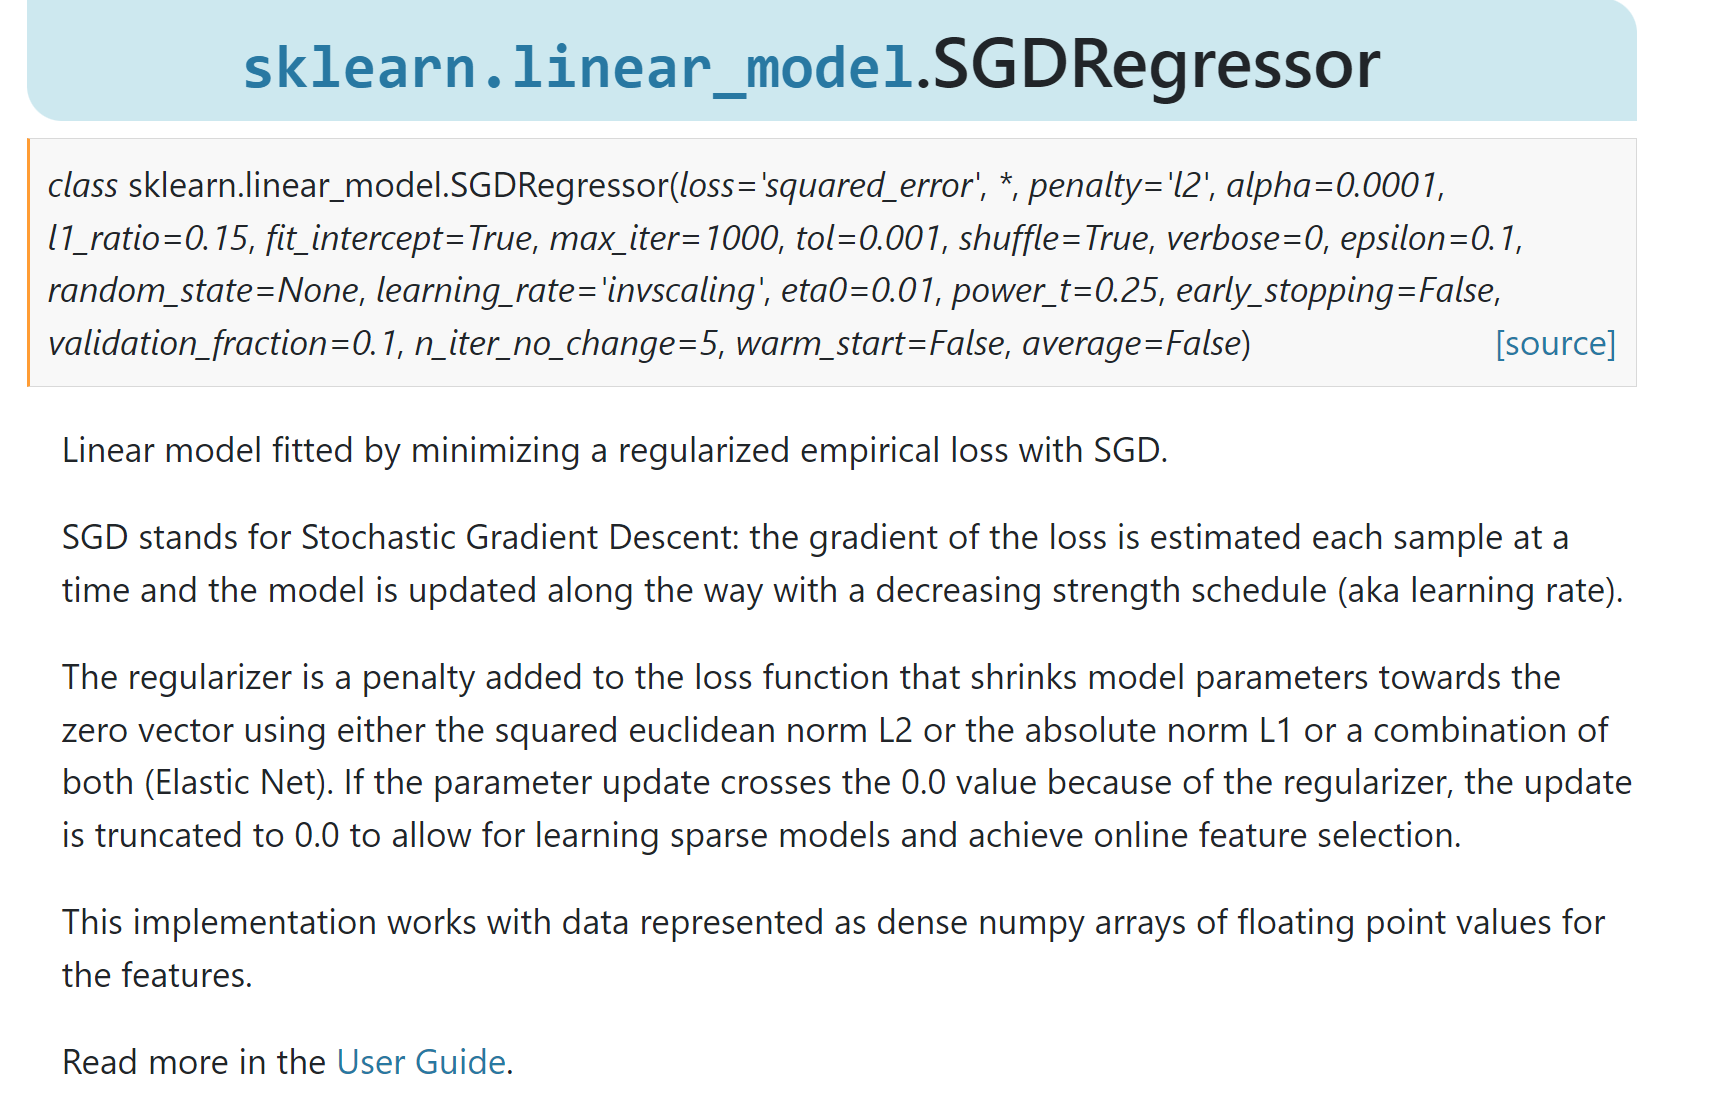

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

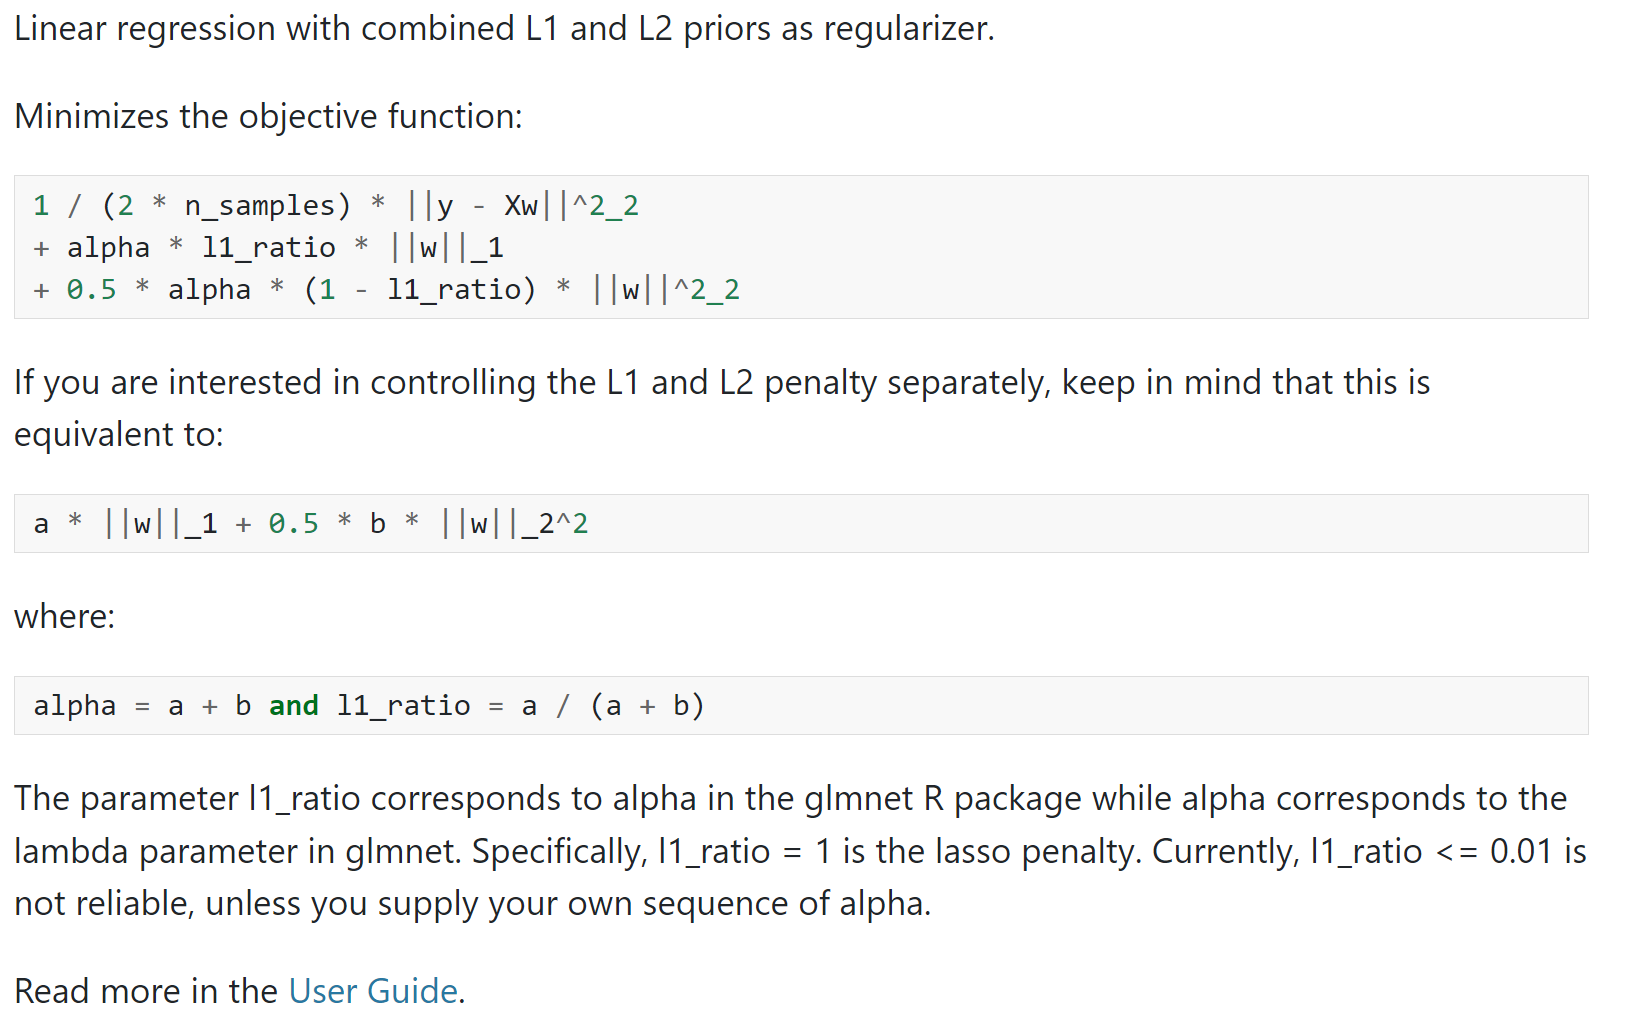

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Text(2.1, 0.05, '$\\mu=0.0132$\n$\\mathrm{med}=0.0085$\n$\\sigma=0.1783$')

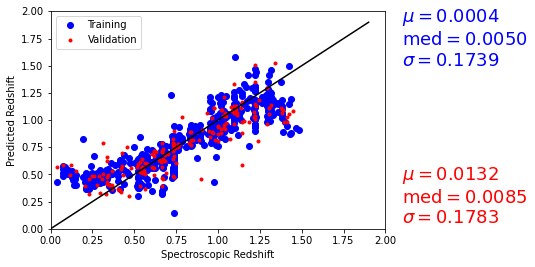

In [37]:


reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.000001, l1_ratio=0.15, 
                                        fit_intercept=True, max_iter=100, tol=0.001, shuffle=True, verbose=0, 
                                        epsilon=0.1, random_state=None, learning_rate='constant', eta0=0.01, 
                                        power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                                        n_iter_no_change=5, warm_start=False, average=False)



reg.fit (X_tr_Norm,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)



plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(0,2,.1),  np.arange(0,2,.1),'-k')
plt.xlabel('Spectroscopic Redshift')
plt.ylabel('Predicted Redshift')
plt.legend(['Training', 'Validation'])
plt.xlim([0,2])
plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(2.1,1.5,textstr, color='b',fontsize=18)
plt.text(2.1,.05,textstrv, color='r',fontsize=18)


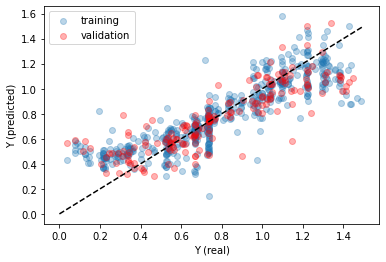

In [38]:
# The same as above, with different visualization
plt.scatter(Y_tr,Y_tr_pred,label='training',alpha=.3)
plt.scatter(Y_va,Y_va_pred,label='validation',color='r',alpha=.3) 
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

# Comparing predicted and actual values

mean =  -0.00036853812722519025
median =  -0.005008154566914447
SD =  0.17387664275946582


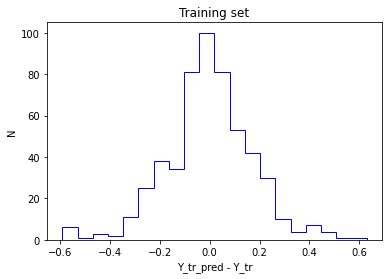

In [39]:
# Inspect the distribution of the difference between the predicted and actual values for the training set (A Gaussian distribution is expected)
plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step')
plt.xlabel('Y_tr_pred - Y_tr')
plt.ylabel('N')
plt.title('Training set')
print ('mean = ',np.mean(Y_tr_pred-Y_tr) )
print ('median = ',np.median(Y_tr_pred-Y_tr) )
print ('SD = ',np.std(Y_tr_pred-Y_tr) )

mean =  -0.013192671274266897
median =  -0.008517213013611302
SD =  0.17833240421748375


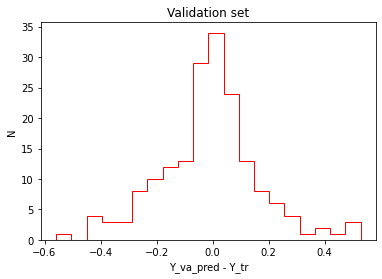

In [40]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set (A Gaussian distribution is expected)
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step')
plt.xlabel('Y_va_pred - Y_tr')
plt.ylabel('N')
plt.title('Validation set')

print ('mean = ',np.mean(Y_va_pred-Y_va) )
print ('median = ',np.median(Y_va_pred-Y_va) )
print ('SD = ',np.std(Y_va_pred-Y_va) )

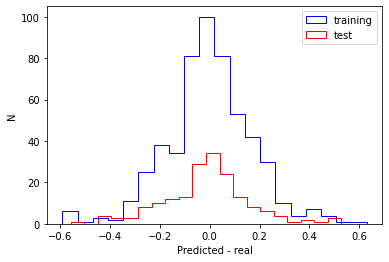

In [41]:
# Inspect the distribution of the difference between the predicted and actual values for the two sets (A Gaussian distribution is expected)

plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',label='test')
plt.xlabel('Predicted - real')
plt.ylabel('N')
plt.legend()



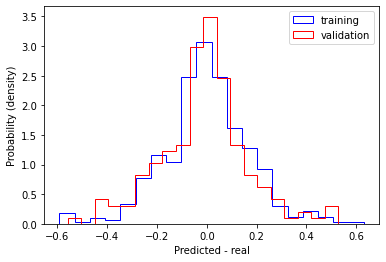

In [42]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.

plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()


# Inspecting systematic errors.  The best is to have asymmetric Gaussian density around the dashed line

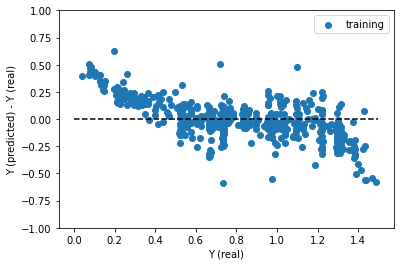

In [43]:
# Inspecting systematic errors for the training set
plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.5],[0,0],'--k')
plt.ylim([-1,1])
plt.legend()

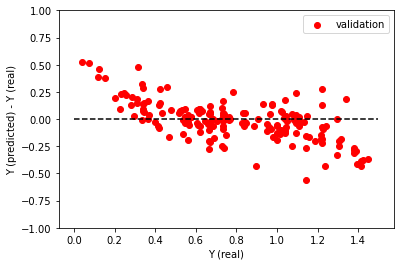

In [44]:
# Inspecting systematic errors for the validation set
plt.scatter(Y_va,Y_va_pred-Y_va,label='validation',color='r')
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.5],[0,0],'--k')
plt.ylim([-1,1])
plt.legend()

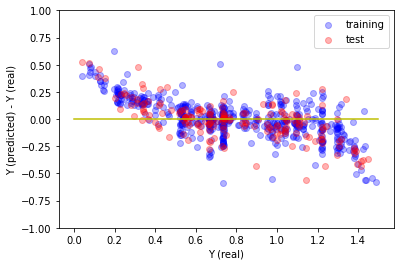

In [45]:
# Inspecting systematic errors for the training set and validation set together 

plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.5],[0,0],'y')
plt.ylim([-1,1])
plt.legend()

In [69]:
degree= 3


# for example, if  degree = 2 and if we have 7 columns, then the following line creates a table of 36 
#columns of the possible combination to power 2combinations
poly = PolynomialFeatures(degree,include_bias=False)


poly.fit(X_tr_Norm)  # fitting the model based on the training set

X_tr_Norm_Ext=poly.transform(X_tr_Norm)  # transforming the training set 

X_va_Norm_Ext=poly.transform(X_va_Norm)  # transforming the validation set 

print ('size and dimension of training set = ', np.shape(X_tr_Norm_Ext))
print ('size and dimension of validation set = ', np.shape(X_va_Norm_Ext))

size and dimension of training set =  (534, 119)
size and dimension of validation set =  (179, 119)


c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Text(2.1, 0.05, '$\\mu=-0.0012$\n$\\mathrm{med}=0.0195$\n$\\sigma=0.1894$')

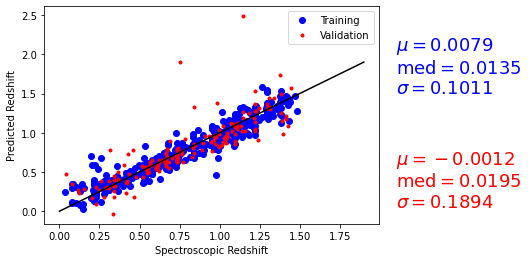

In [70]:
reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.0001, l1_ratio=0.15, 
                                        fit_intercept=True, max_iter=10000000, tol=0.000001, shuffle=True, verbose=0, 
                                        epsilon=0.1, random_state=None, learning_rate='constant', eta0=0.00001, 
                                        power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                                        n_iter_no_change=5, warm_start=False, average=False)



reg.fit (X_tr_Norm_Ext,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm_Ext)  
Y_va_pred= reg.predict(X_va_Norm_Ext)


plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(0,2,.1),  np.arange(0,2,.1),'-k')
plt.xlabel('Spectroscopic Redshift')
plt.ylabel('Predicted Redshift')
plt.legend(['Training', 'Validation'])
#plt.xlim([0,2])
#plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(2.1,1.5,textstr, color='b',fontsize=18)
plt.text(2.1,.05,textstrv, color='r',fontsize=18)


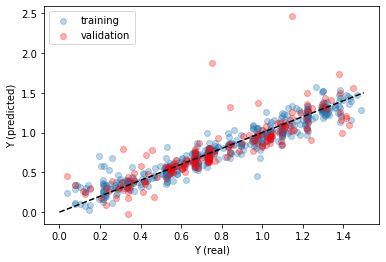

In [61]:
# The same as above, with different visualization
plt.scatter(Y_tr,Y_tr_pred,label='training',alpha=.3)
plt.scatter(Y_va,Y_va_pred,label='validation',color='r',alpha=.3) 
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted)')
plt.plot([0,1.5],[0,1.5],'--k')
plt.legend()

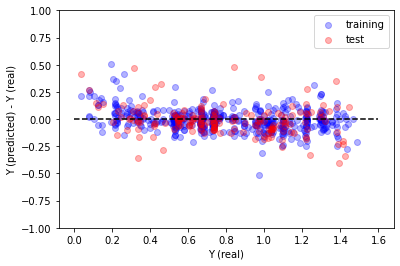

In [62]:
# Inspecting systematic errors for the training set and validation set together 

plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([0,1.6],[0,0],'--k')
plt.ylim([-1,1])
plt.legend()